<a href="https://colab.research.google.com/github/lisabortiz/Data-Science-Portfolio/blob/main/Project_2/Project_2_Housing_Description_for_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Housing Price Prediction


- by Lisa Ortiz, 10/11/2025

The project should be done using Regression prediction techniques ( with feature scaling and regularization ) as covered in class.
The goal is to minimize the RMS ***percentage*** error ( root mean squared percentage error - RMSPE ) on your prediction of the house sales price.



Any of the available features can be used in the regression, but a minimum set of variables that do the job should be the ultimate goal.



Be sure to go through the whole data science process and document as such in your Jupyter notebook.



This project will have less direct "To Do" guidance and the progression through the data science process will be more individualized this time around.
We will talk about all the issues during class so you're not going to be out on a ledge with this one, I just want to move you towards performing a data science project on your own eventually.



A data dictionary file is available at AWS S3 at [Housing Data Dictionary]( https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Housing%20-%20Data%20Documentation.pdf ).

The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv .


## Problem Definition
>"What's going on?"

**Type of Problem**

Our target is House sales price.

Given that our target is continuous numerical data, we have a supervised learning problem for which a regression method would be great!


## Data Collection/Sources
>"Initial Setup"



The following below are libraries that will help with building a learning model.

In [ ]:
#load libraries
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import sklearn

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


Data was provided by Robert Citek, which is shared through AWS for access.

In [ ]:
#assign paths from servers
base_path ="https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/"
train_path = base_path + 'Housing.Data.csv'


In [ ]:
#File Path given by Robert Citek.
train_path

'https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv'

### Load the data

In [ ]:
#load data from CSV File
train_orig = pd.read_csv(train_path)
train_orig

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,903231070,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500
2633,906201021,80,RL,74.0,10778,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,162000
2634,533253070,120,RL,61.0,3782,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,211500
2635,527376100,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,165000


### Create a copy

It is important to creat copies to insure the original data imported is protected.  We create a copy of the original data set below:

In [ ]:
#create a copy of original data base
train = train_orig.copy()
train

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,903231070,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500
2633,906201021,80,RL,74.0,10778,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,162000
2634,533253070,120,RL,61.0,3782,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,211500
2635,527376100,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,165000


###Inspection
Now that the libraries are imported and the data set is loaded, we can verify it's import and perform an initial inspection of the data.

In the inital check, we look at a few details:


*   Head (first 5 rows)
*   Tail (Last 5 rows)
*   Info (File size, data types, rows, colums)
*   Shape (Row and Column Count)
*   Size (individual elements)

This gives a quick glance at what kind of forseeable challenges with the current data set.



In [ ]:
train.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


In [ ]:
train.tail()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2632,903231070,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500
2633,906201021,80,RL,74.0,10778,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,162000
2634,533253070,120,RL,61.0,3782,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,211500
2635,527376100,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,165000
2636,528292060,60,RL,41.0,12460,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,225000


In [ ]:
#Get a sense of the size of data set using *.shape method
train.shape

(2637, 81)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

In [ ]:
#Return how many data values ("elements in object") in totality using *.size method
train.size

213597

### Check Data For Use

Some of the important details to check regarding data set are the following:


*   Total Number of Null Values
*   Total Number of Unique Values
*   Target and its contents
*   Null Values in Target Column
*   Percentage of Null Values compared to the Whole Column
*   Sums

This gives some insight to the direction we should take to start cleaning data.  

There is a significant amount of null values in Target, Columns and Rows.  




In [ ]:
train.describe(include ="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PID,2637.0,NaN,NaN,NaN,714130147.70383,188752674.750322,526301100.0,528477010.0,535453040.0,907187010.0,1007100110.0
MS SubClass,2637.0,NaN,NaN,NaN,57.349261,42.499091,20.0,20.0,50.0,70.0,190.0
MS Zoning,2637,7,RL,2043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Frontage,2188.0,NaN,NaN,NaN,69.166819,23.356779,21.0,58.0,68.0,80.0,313.0
Lot Area,2637.0,NaN,NaN,NaN,10044.694729,6742.549521,1300.0,7436.0,9450.0,11526.0,164660.0
...,...,...,...,...,...,...,...,...,...,...,...
Mo Sold,2637.0,NaN,NaN,NaN,6.243838,2.722093,1.0,4.0,6.0,8.0,12.0
Yr Sold,2637.0,NaN,NaN,NaN,2007.795601,1.306403,2006.0,2007.0,2008.0,2009.0,2010.0
Sale Type,2637,10,WD,2286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sale Condition,2637,6,Normal,2166,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train.nunique().sort_values(ascending=False)

,0
PID,2637
Lot Area,1799
Gr Liv Area,1216
Bsmt Unf SF,1080
1st Flr SF,1022
...,...
Bsmt Half Bath,3
Paved Drive,3
Street,2
Alley,2


In [ ]:
train["SalePrice"].unique()

array([115400,  90000, 141000, 254000, 155000, 125000, 194500, 185000,
       235000, 152000, 201000, 207000, 192000, 174000, 190000, 176000,
       384500, 395039, 167000, 165000, 195000, 104500, 161000, 245700,
       226001, 153500, 139000,  35000, 181000, 212000, 156000, 139500,
       225000,  12789, 157500, 110000, 130000, 263000, 205000, 117000,
       200624, 120000, 137900, 245500, 107000, 327000,  93000, 145250,
       168000, 169900, 122000, 161750, 188000, 149500, 421250, 305000,
        50138, 136000, 150750, 307000, 241000,  86900, 202500,  93500,
       121000, 107500, 336000, 213000, 129000, 170000, 337500, 535000,
       173500, 162000,  37900, 158500,  94000, 350000, 140000, 409900,
       115000, 177000,  94750, 121600, 128500, 301000, 230000, 151000,
       137500,  85500, 129400, 191500, 250000, 135000, 119000, 150000,
       178000, 163900, 199000, 203000, 178900, 180000, 182000, 177900,
       122500, 134900, 132000, 147983,  68500, 158000, 260261,  64500,
      

In [ ]:
#total number of Null Values in Data set
train.isnull()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2633,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2634,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2635,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False


In [ ]:
#Total of Not Null Values
train.size - train.isna().sum().sum()

np.int64(199389)

In [ ]:
train.isna().sum().sum()

np.int64(14208)

In [ ]:
sums = train.isna().sum()
sums

,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,449
Lot Area,0
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


In [ ]:
train.shape


(2637, 81)

### Backup of Data

Before modifiying the copied data set, I decided to create a "save point".  This code block allows for a quick reload of previously unmodified data.  

In [ ]:
# Make a backup.
train_bak_v01 = train.copy()
train_bak_v01

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,903231070,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500
2633,906201021,80,RL,74.0,10778,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,162000
2634,533253070,120,RL,61.0,3782,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,211500
2635,527376100,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,165000


In [ ]:
# Restore from backup.
train = train_bak_v01.copy()
train

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,903231070,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500
2633,906201021,80,RL,74.0,10778,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,162000
2634,533253070,120,RL,61.0,3782,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,211500
2635,527376100,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,165000


## Data Cleaning

>  "Clean Up Data"

**We discussed how to check data.  Now, I take that information to make some decisions of cleaning up the data.**

1.  We have some unique identifiers within the data set that do
not include useful information for creating a predictive model.  So, chuck those.

2.  Next we remove Columns with Null values.
*   If you remove the columns with *any* null values, it removes too many columns.  We need some columns to create predictions.  This is where that Backup came in handy. (I left the code in for demonstration.)
*   Later, I removed columns that had *only* null values.  These were useless clutter or "noise".

3. I also removed Rows with Null Values.

4. Reviewed the changes by using Size.

5. Checked for Duplicate Rows in data.

6. I also tested a method for removing Columns with a total percentage of null values.  It did not improve results.  (I left it for demonstration.)



In [ ]:
#remove all the objects from the data set
train_numeric = train.select_dtypes(exclude=['object'])
train_numeric

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,905101070,20,62.0,14299,4,3,1964,1964,0.0,513.0,...,0,0,0,0,0,0,0,7,2007,115400
1,905101330,90,72.0,10791,4,5,1967,1967,0.0,0.0,...,0,0,0,0,0,0,500,10,2006,90000
2,903454090,50,50.0,9000,6,6,1937,1950,0.0,0.0,...,0,162,0,0,126,0,0,12,2007,141000
3,533244030,60,68.0,7379,8,5,2000,2000,0.0,484.0,...,280,184,0,0,0,0,0,4,2010,254000
4,909252020,70,60.0,7200,7,9,1936,2007,0.0,350.0,...,256,0,0,0,0,0,0,4,2009,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,903231070,50,52.0,6240,6,6,1934,1950,0.0,0.0,...,112,0,0,0,0,0,400,9,2006,114500
2633,906201021,80,74.0,10778,7,6,1990,1991,0.0,460.0,...,114,36,0,0,0,0,0,7,2009,162000
2634,533253070,120,61.0,3782,8,5,1981,1981,0.0,960.0,...,133,78,0,0,0,0,0,9,2009,211500
2635,527376100,20,78.0,10140,6,5,1974,1974,174.0,0.0,...,0,0,0,0,0,0,0,8,2009,165000


In [ ]:
#Remove Unique Identifiers
#Here we list all the columns within the data set.
train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   Lot Frontage     2188 non-null   float64
 3   Lot Area         2637 non-null   int64  
 4   Overall Qual     2637 non-null   int64  
 5   Overall Cond     2637 non-null   int64  
 6   Year Built       2637 non-null   int64  
 7   Year Remod/Add   2637 non-null   int64  
 8   Mas Vnr Area     2614 non-null   float64
 9   BsmtFin SF 1     2636 non-null   float64
 10  BsmtFin SF 2     2636 non-null   float64
 11  Bsmt Unf SF      2636 non-null   float64
 12  Total Bsmt SF    2636 non-null   float64
 13  1st Flr SF       2637 non-null   int64  
 14  2nd Flr SF       2637 non-null   int64  
 15  Low Qual Fin SF  2637 non-null   int64  
 16  Gr Liv Area      2637 non-null   int64  
 17  Bsmt Full Bath

In [ ]:
#Select the columns we identified as "Unique Identifiers" and Categorical numerical data in our inspection by assigning
# it to a list, ("bye"), that we want to remove.
bye = ['PID', 'MS SubClass','Overall Qual','Overall Cond','Garage Yr Blt','Year Built','Year Remod/Add','Misc Val','Mo Sold','Yr Sold' ]

In [ ]:
train_numeric.columns

Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [ ]:
#Drop the selected columns
train_numeric.drop(columns=bye, inplace=True)
train_numeric

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,...,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,SalePrice
0,62.0,14299,0.0,513.0,144.0,348.0,1005.0,1005,0,0,...,0,2.0,440.0,0,0,0,0,0,0,115400
1,72.0,10791,0.0,0.0,0.0,0.0,0.0,1296,0,0,...,0,2.0,516.0,0,0,0,0,0,0,90000
2,50.0,9000,0.0,0.0,0.0,780.0,780.0,780,595,0,...,1,1.0,544.0,0,162,0,0,126,0,141000
3,68.0,7379,0.0,484.0,0.0,491.0,975.0,975,873,0,...,1,2.0,592.0,280,184,0,0,0,0,254000
4,60.0,7200,0.0,350.0,210.0,0.0,560.0,575,560,0,...,0,2.0,576.0,256,0,0,0,0,0,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,52.0,6240,0.0,0.0,0.0,816.0,816.0,816,0,360,...,1,2.0,528.0,112,0,0,0,0,0,114500
2633,74.0,10778,0.0,460.0,286.0,308.0,1054.0,1061,0,0,...,0,2.0,462.0,114,36,0,0,0,0,162000
2634,61.0,3782,0.0,960.0,0.0,266.0,1226.0,1226,0,0,...,2,2.0,484.0,133,78,0,0,0,0,211500
2635,78.0,10140,174.0,0.0,0.0,1064.0,1064.0,1350,0,0,...,1,2.0,478.0,0,0,0,0,0,0,165000


In [ ]:
#Check Target("SalesPrice") for Nulls
train_numeric['SalePrice'].isna().sum()

np.int64(0)

In [ ]:
# mask of those columns with 50% NotNull
mask = ((train_numeric.isnull().sum(axis=1) / train_numeric.shape[1]) * 100) > 50
mask.sum()
#remove content columns of mask from train data set
train_numeric=train_numeric[~mask]

#remove the columns of mask from training data set with a lot of Nulls
#train_numeric.isnull().sum(axis=1)
# train_numeric.dropna(axis=1, thresh=1000, inplace=True)


In [ ]:
train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2188 non-null   float64
 1   Lot Area         2637 non-null   int64  
 2   Mas Vnr Area     2614 non-null   float64
 3   BsmtFin SF 1     2636 non-null   float64
 4   BsmtFin SF 2     2636 non-null   float64
 5   Bsmt Unf SF      2636 non-null   float64
 6   Total Bsmt SF    2636 non-null   float64
 7   1st Flr SF       2637 non-null   int64  
 8   2nd Flr SF       2637 non-null   int64  
 9   Low Qual Fin SF  2637 non-null   int64  
 10  Gr Liv Area      2637 non-null   int64  
 11  Bsmt Full Bath   2635 non-null   float64
 12  Bsmt Half Bath   2635 non-null   float64
 13  Full Bath        2637 non-null   int64  
 14  Half Bath        2637 non-null   int64  
 15  Bedroom AbvGr    2637 non-null   int64  
 16  Kitchen AbvGr    2637 non-null   int64  
 17  TotRms AbvGrd 

In [ ]:
train_numeric.shape

(2637, 28)

In [ ]:
train_numeric.duplicated().sum()

np.int64(4)

In [ ]:
mask = train_numeric.duplicated(keep='first')
train_numeric = train_numeric[~mask]
train_numeric.shape

(2633, 28)

## Exploratory Data Analysis
> "Look Around"

After Cleaning the Data set, we can explore the data for:
*  Patterns and Relations of data variables
*  Outliers
*  Obvious Errors

###Are We Using The Right Model?

**Linear Regression**

When using Linear Regression, it is important for a effective model to have two assumptions met in data:
*  No Collinearity
*  Linear relationship
*  Residuals are normally distributed
*  Constant variance of residuals
*  Independent residuals

We can use Heat Maps like Correlation Matrix to find relationships.

We can use Histograms to find variation in data.

And we can take some "peeks" at the data to get a sense of how our data has changed after cleaning.

Correlation plot shows some promising variables.

Histogram grid plot shows ???.

**Looks like we are on track!**

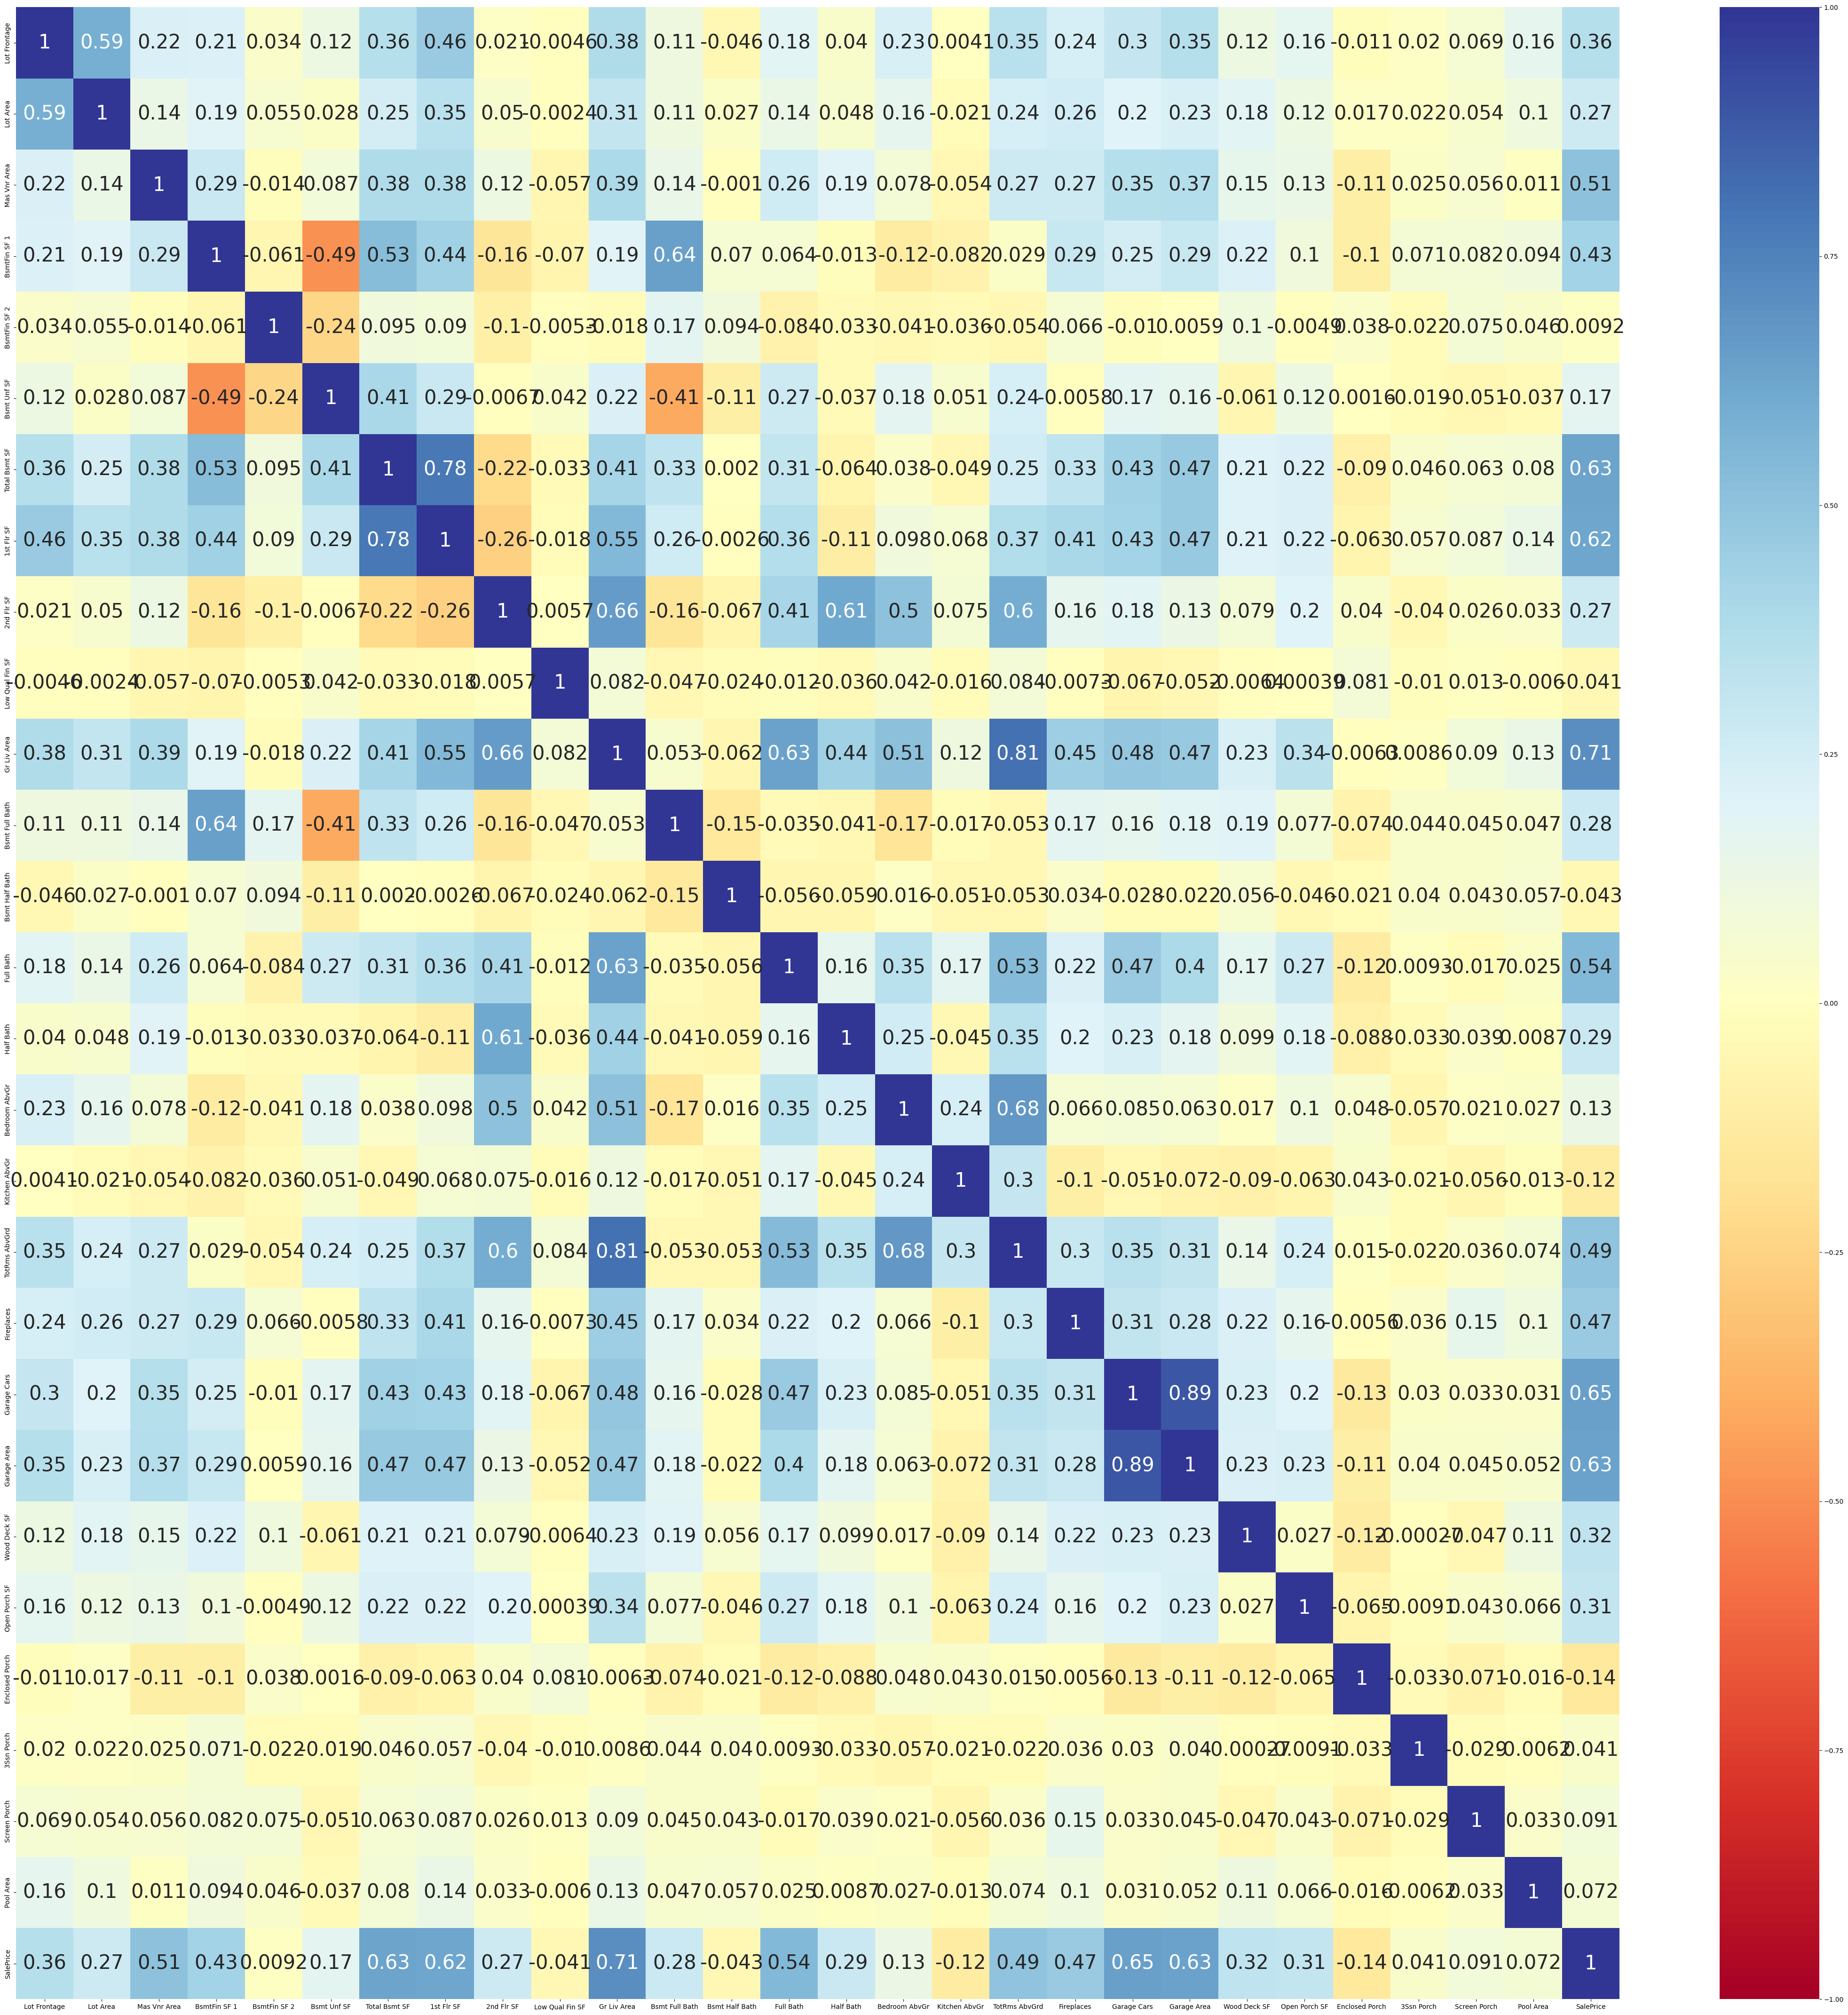

In [ ]:
#Correlation plot shows relationship between "target" and other variables.

corr = train_numeric.select_dtypes(include='number').corr()
plt.figure(figsize=(55,55))
sns.heatmap(corr, cmap='RdYlBu', annot=True, vmin = -1, vmax = 1, annot_kws={"fontsize": 30});

array([[<Axes: title={'center': 'Lot Frontage'}>,
        <Axes: title={'center': 'Lot Area'}>,
        <Axes: title={'center': 'Mas Vnr Area'}>,
        <Axes: title={'center': 'BsmtFin SF 1'}>,
        <Axes: title={'center': 'BsmtFin SF 2'}>],
       [<Axes: title={'center': 'Bsmt Unf SF'}>,
        <Axes: title={'center': 'Total Bsmt SF'}>,
        <Axes: title={'center': '1st Flr SF'}>,
        <Axes: title={'center': '2nd Flr SF'}>,
        <Axes: title={'center': 'Low Qual Fin SF'}>],
       [<Axes: title={'center': 'Gr Liv Area'}>,
        <Axes: title={'center': 'Bsmt Full Bath'}>,
        <Axes: title={'center': 'Bsmt Half Bath'}>,
        <Axes: title={'center': 'Full Bath'}>,
        <Axes: title={'center': 'Half Bath'}>],
       [<Axes: title={'center': 'Bedroom AbvGr'}>,
        <Axes: title={'center': 'Kitchen AbvGr'}>,
        <Axes: title={'center': 'TotRms AbvGrd'}>,
        <Axes: title={'center': 'Fireplaces'}>,
        <Axes: title={'center': 'Garage Cars'}>],
    

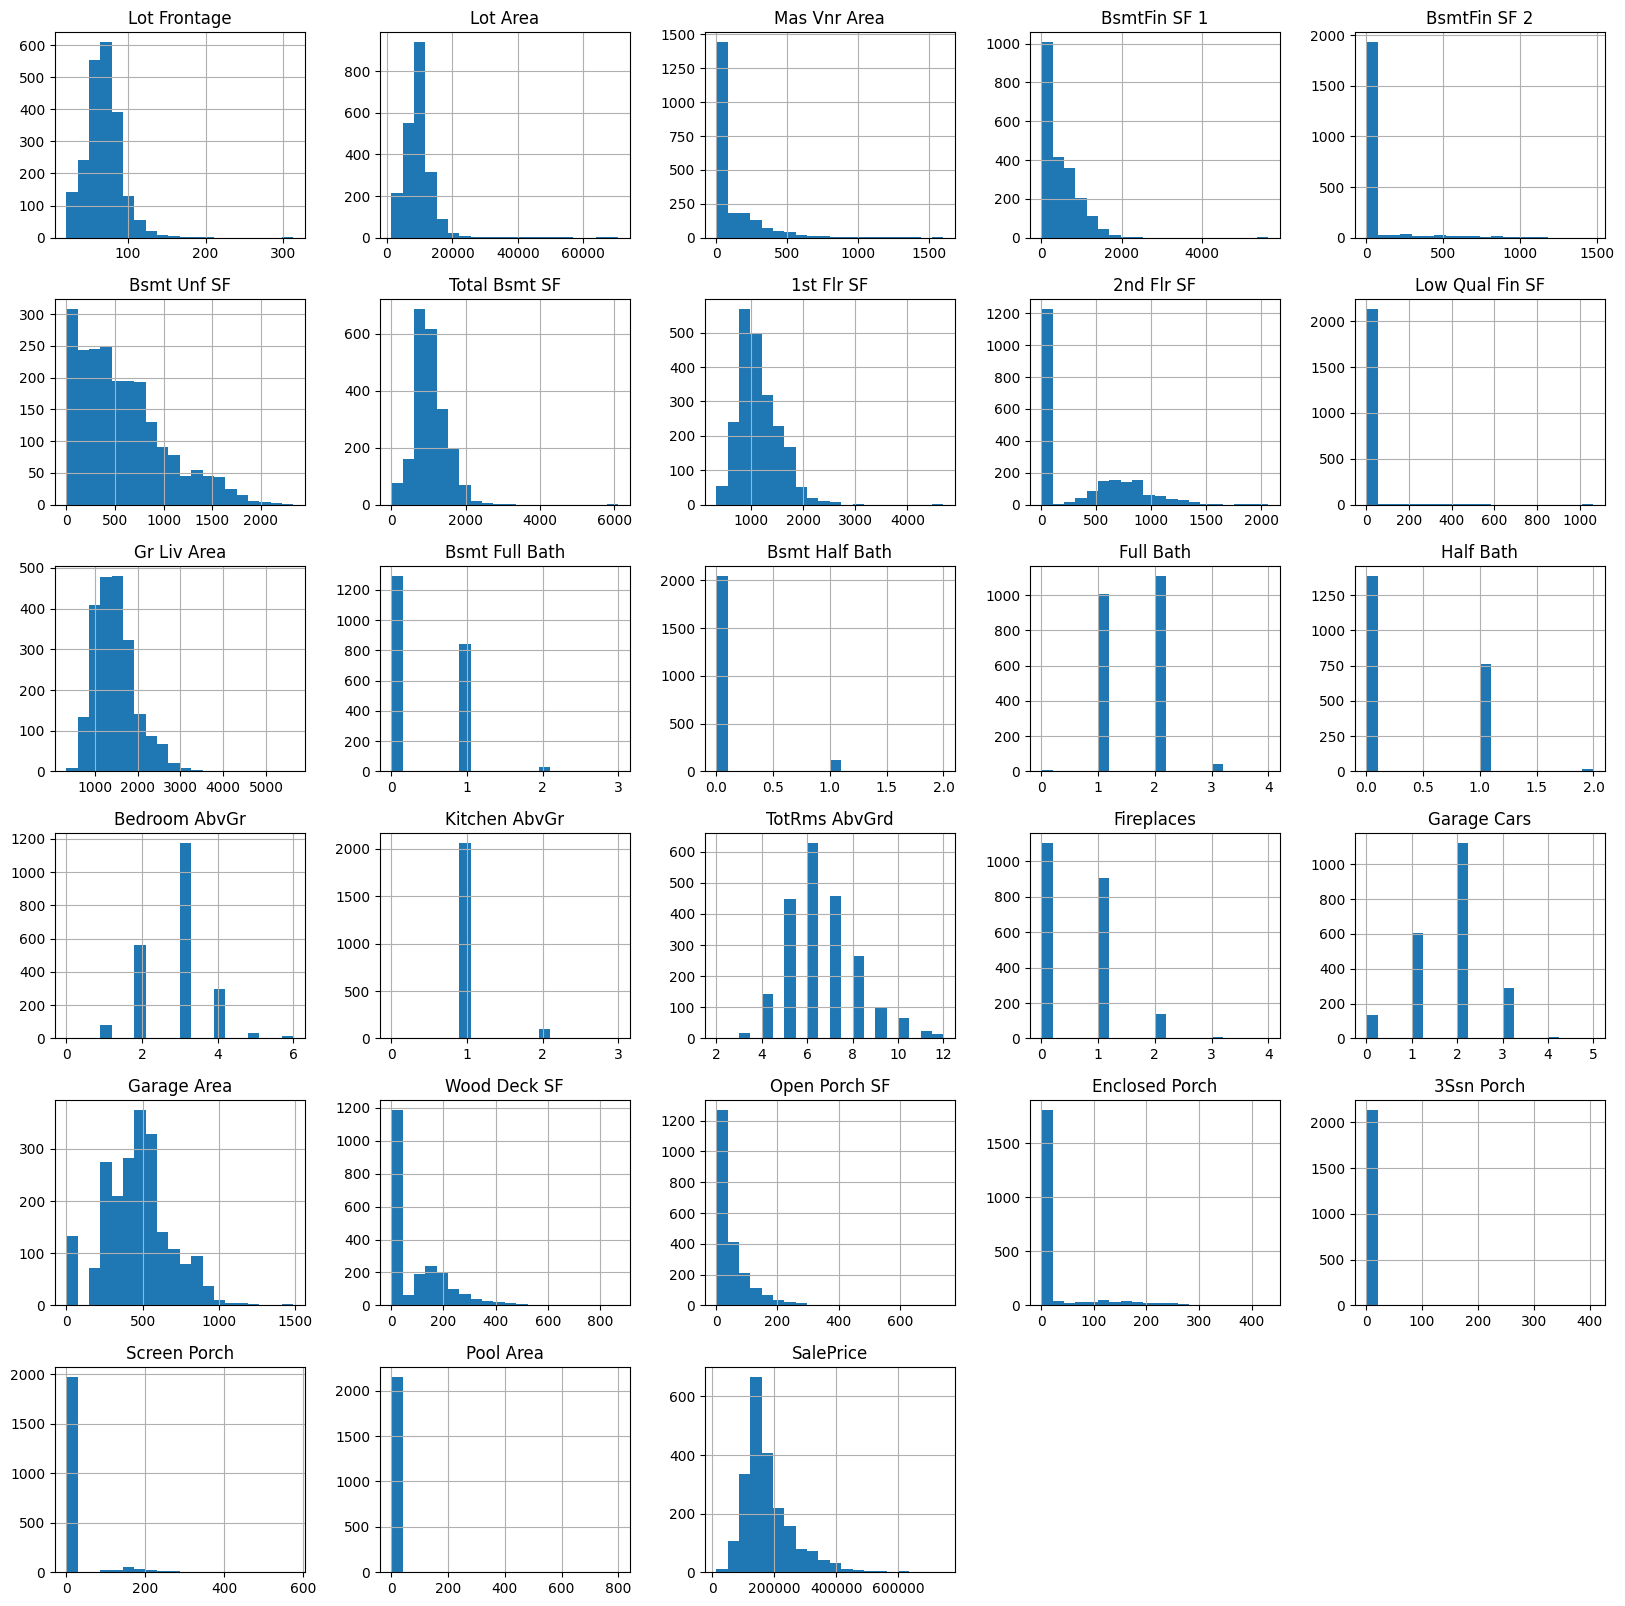

In [ ]:
# Histogram Grid shows distribution of the data across the data set variables.

train_numeric.hist(figsize=(20,20), bins=20)

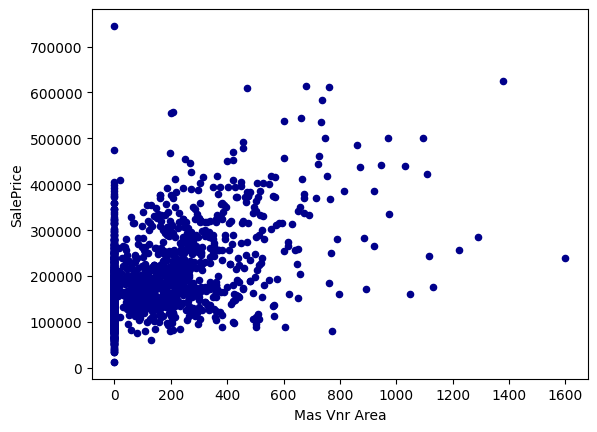

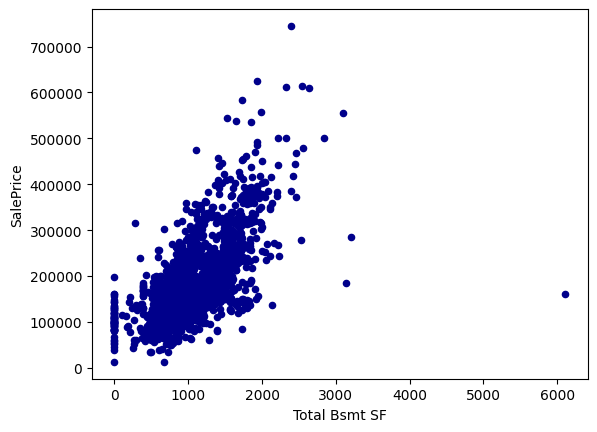

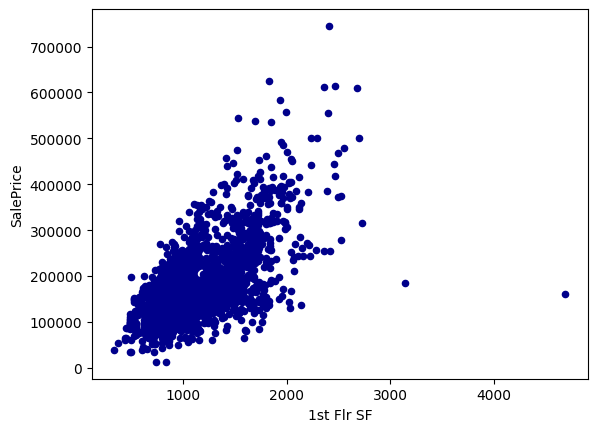

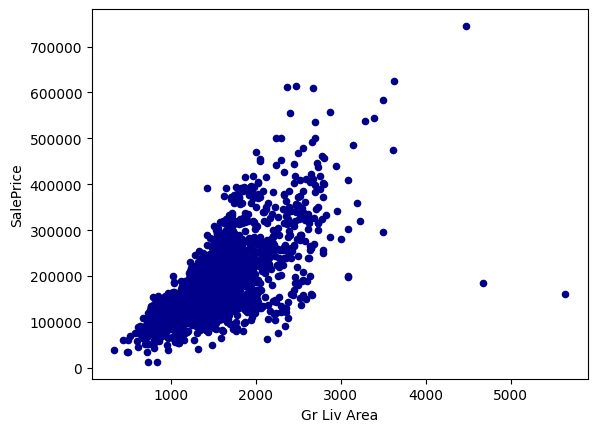

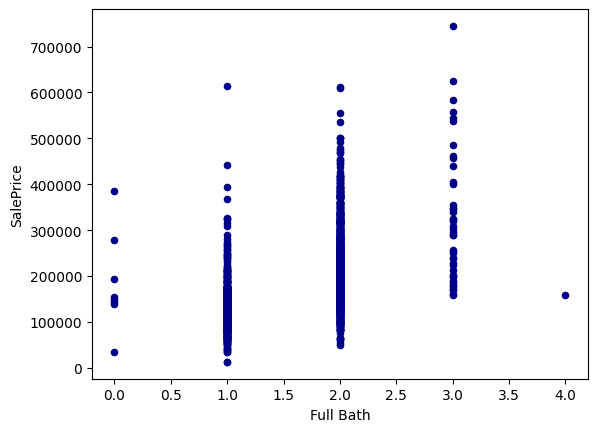

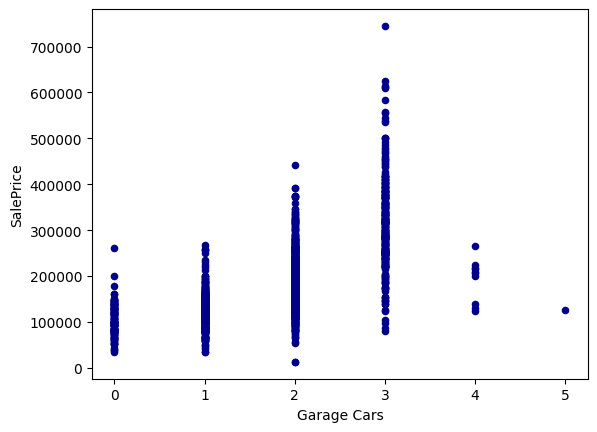

In [ ]:
# Filter values more than Absoulte value of 0.5.
filter = np.abs(corr["SalePrice"]) > .5
corr[filter]
selected_columns=corr[filter].index
selected_columns

# Plotting the Variables compared to the Sales Price prior to calcuations (the range excludes SalePrice)
for variable in selected_columns[0:6]:
  train_numeric.plot.scatter(x=variable,
                        y='SalePrice',
                        c='DarkBlue')
plt.show()

Create a filter from the correlation plot, to find variables that have a strong correlation.  This filter will be used in creating a training set.

##Data Processing
>  "Crunch Numbers"

It is important to split the data to perform Linear Regression model.  So, we start by splitting a portion of the data.


In [ ]:
#drop ANY rows found with Null Values
train_numeric.dropna(how='any', inplace=True)

In [ ]:
# First we will break up our data into training and testing sets
y = train_numeric['SalePrice']
X = train_numeric[selected_columns].copy()
X.drop('SalePrice', axis=1, inplace=True)

# normalize the features
scaler = StandardScaler()
scaler.fit_transform(X)


array([[-0.55227024, -0.08885388, -0.36965545, ..., -1.00741479,
         0.32762966, -0.1214375 ],
       [-0.55227024, -2.37451481,  0.38594273, ...,  0.82609707,
         0.32762966,  0.22472936],
       [-0.55227024, -0.60056902, -0.95388085, ..., -1.00741479,
        -0.94524391,  0.35226451],
       ...,
       [-0.55227024,  0.41376409,  0.20418372, ..., -1.00741479,
         0.32762966,  0.07897489],
       [ 0.41416867,  0.0453292 ,  0.52615683, ...,  0.82609707,
         0.32762966,  0.05164593],
       [-0.55227024, -0.01607662, -0.28656562, ...,  0.82609707,
         0.32762966, -0.30363058]])

In [ ]:
X.columns


Index(['Mas Vnr Area', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area',
       'Full Bath', 'Garage Cars', 'Garage Area'],
      dtype='object')

In [ ]:
#Scale the data off of Sales, and split the data
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=5)


In [ ]:
X.head()


,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Garage Cars,Garage Area
0,0.0,1005.0,1005,1005,1,2.0,440.0
1,0.0,0.0,1296,1296,2,2.0,516.0
2,0.0,780.0,780,1375,1,1.0,544.0
3,0.0,975.0,975,1848,2,2.0,592.0
4,0.0,560.0,575,1135,1,2.0,576.0


In [ ]:
X_scaled.head()


,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Garage Cars,Garage Area
0,-0.55227,-0.088854,-0.369655,-0.972918,-1.007415,0.327630,-0.121437
1,-0.55227,-2.374515,0.385943,-0.383083,0.826097,0.327630,0.224729
2,-0.55227,-0.600569,-0.953881,-0.222956,-1.007415,-0.945244,0.352265
3,-0.55227,-0.157083,-0.447552,0.735779,0.826097,0.327630,0.570896
4,-0.55227,-1.100913,-1.486175,-0.709418,-1.007415,0.327630,0.498019


In [ ]:
# Fit a linear model using Sklearn
model = LinearRegression()
my_fit_lr = model.fit(X_train, y_train)


In [ ]:
# Create a data frame with the results from the linear regression models
model_results = pd.DataFrame()
model_results['Predictor'] = X_train.columns
model_results['Linear'] = my_fit_lr.coef_
model_results.sort_values(by=['Linear'],inplace=True, ascending=False)
model_results


,Predictor,Linear
3,Gr Liv Area,25932.670695
1,Total Bsmt SF,19897.730552
5,Garage Cars,19399.093793
0,Mas Vnr Area,12628.604848
4,Full Bath,6955.335468
6,Garage Area,4354.761473
2,1st Flr SF,2455.161845


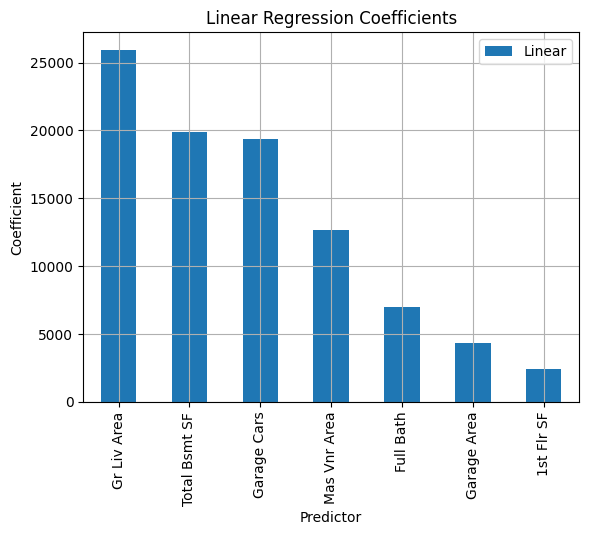

In [ ]:
# We can even plot the coefficients if we want to!
model_results.plot(x = 'Predictor', y = 'Linear', kind = 'bar', ylabel='Coefficient', title='Linear Regression Coefficients')
plt.grid()

In [ ]:
#Function Calculating Root Mean Square Percentage Error
def calcrmspe(estimator, X, y):
  '''RMSPE is a function that will calculate the Root Mean Square Percentage Error and return its value
  '''
  y_pred = estimator.predict(X)
  rmspe = (((y - y_pred) / y) **2).mean()**(1/2) * 100
  return rmspe


In [ ]:
# Calculate Linear CV RMSPE
results = cross_val_score(
    model,
    X_scaled,
    y,
    scoring=calcrmspe,
    cv = 10
    )
rmspe = results.mean()
print(f"Linear CV RMSPE: {rmspe}")


Linear CV RMSPE: 33.13514729295811


In [ ]:
# Train the model
my_fit_rr = Ridge(alpha = 1) # Arbitrarily choosing alpha = 1
my_fit_rr.fit(X_train, y_train) ;

In [ ]:
# Calculate RMSPE
y_pred = my_fit_rr.predict(X_test)
#rmse = np.sqrt(np.mean(np.square(y_test - y_pred)))
rmspe = (((y_test - y_pred) / y_test) **2).mean()**(1/2) * 100
print(f"Ridge RMSPE: {rmspe}")

Ridge RMSPE: 27.053847344453597


In [ ]:
# Specify values of alpha we want to try
alph = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20, 30, 50]

# Create empty list to hold results
results_alpha = []

for i in alph:
  # Train the model
  my_fit_rr = Ridge(alpha = i) # Looping through alpha
  my_fit_rr.fit(X_train, y_train)

  # Calculate CV RMSPE
  results = cross_val_score(
      my_fit_rr,
      X_scaled,
      y,
      scoring=calcrmspe,
      cv = 10
      )
  rmspe = results.mean()
  results_alpha.append(rmspe)

results_df = pd.DataFrame({'Alpha': alph, 'RMSPE': results_alpha})
print(results_df.sort_values(by=['RMSPE']))

           Alpha      RMSPE
0   1.000000e-15  33.135147
1   1.000000e-10  33.135147
2   1.000000e-08  33.135147
3   1.000000e-04  33.135147
4   1.000000e-03  33.135149
5   1.000000e-02  33.135162
6   1.000000e-01  33.135294
7   1.000000e+00  33.136614
8   2.000000e+00  33.138085
9   3.000000e+00  33.139562
10  4.000000e+00  33.141043
11  5.000000e+00  33.142529
12  1.000000e+01  33.150024
13  2.000000e+01  33.165276
14  3.000000e+01  33.180771
15  5.000000e+01  33.212118


In [ ]:
results_df.sort_values( by = ["Alpha"])

,Alpha,RMSPE
0,1.000000e-15,33.135147
1,1.000000e-10,33.135147
2,1.000000e-08,33.135147
3,1.000000e-04,33.135147
4,1.000000e-03,33.135149
5,1.000000e-02,33.135162
6,1.000000e-01,33.135294
7,1.000000e+00,33.136614
8,2.000000e+00,33.138085
9,3.000000e+00,33.139562


In [ ]:
# Add ridge regression results to data frame we created earlier
model_results['Ridge'] = my_fit_rr.coef_

In [ ]:
model_results

,Predictor,Linear,Ridge
3,Gr Liv Area,25932.670695,12574.345484
1,Total Bsmt SF,19897.730552,18512.308426
5,Garage Cars,19399.093793,3870.928571
0,Mas Vnr Area,12628.604848,24709.632095
4,Full Bath,6955.335468,7610.597138
6,Garage Area,4354.761473,17611.590278
2,1st Flr SF,2455.161845,6107.855663


## Data Visualization
> "Lets Plot"






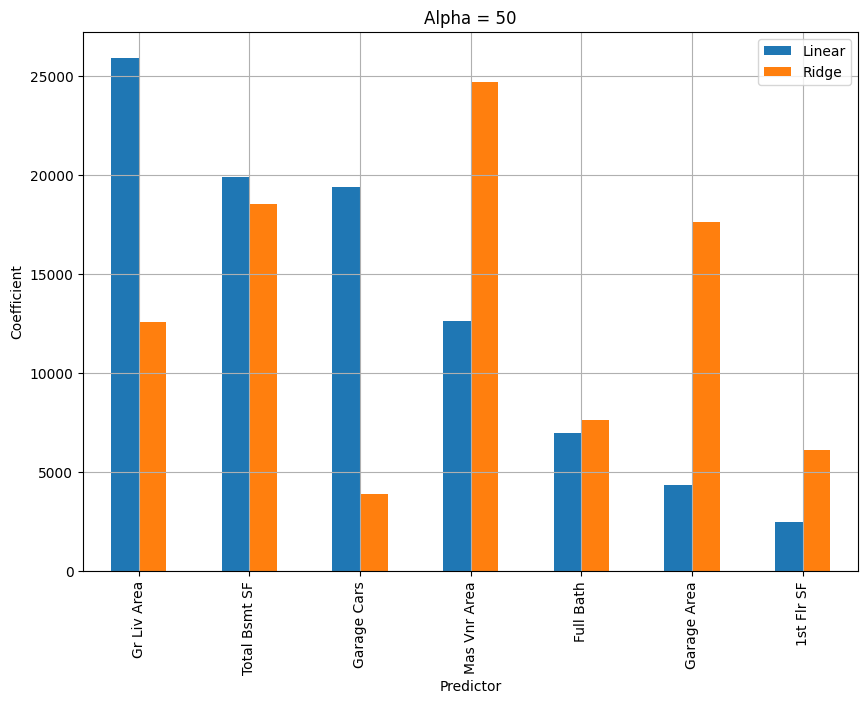

In [ ]:
# Plot results
fig, ax = plt.subplots(1,1, figsize = (10,7))
model_results.plot(x = 'Predictor', kind = 'bar', ax = ax, title="Alpha = 50")
ax.set_ylabel('Coefficient')
plt.grid()

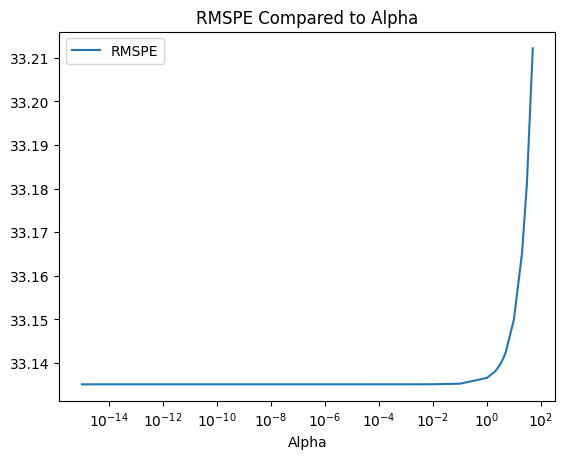

In [ ]:
# Plot with log scale on x-axis
results_df.plot(x='Alpha', y='RMSPE', kind='line', logx=True, title='RMSPE Compared to Alpha')
plt.show()

## Communication of Results
> "What did we find?"

Ground Living Area is a good predictor for linear preditiction model of Sales Prices,
and Masonry Veneer Area is a good predictor for ridge predicition model of Sales Prices.